## Assignment on Classification- iris dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to python environment

In [2]:
# read the iris dataset xls file
data = pd.read_excel("iris1.xls")

In [3]:
# display first 5 rows
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Do the necessary pre-processing steps

#### a) Fill the missing values

In [4]:
# find info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# check for null values in the data
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 7 null values in SL, 6 in SW and PL.

In [6]:
# find the total no. of rows and columns in the data
data.shape

(150, 5)

There are 150 rows and 5 columns.

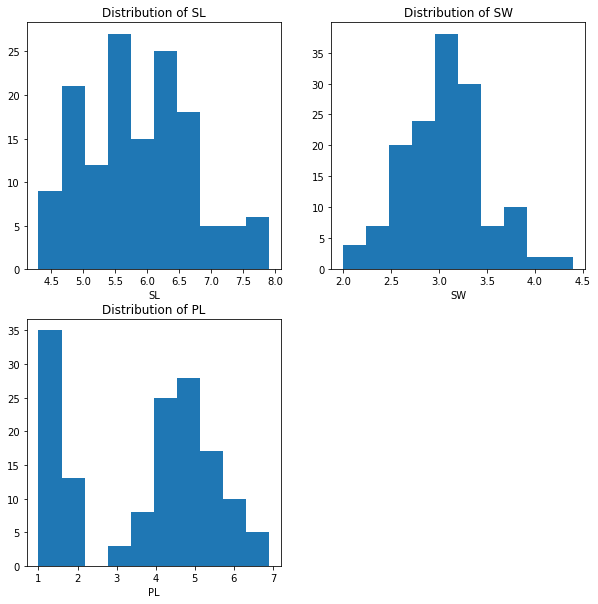

In [7]:
# find the distribution of SL, SW and PL.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(data['SL'])
plt.title("Distribution of SL")
plt.xlabel("SL")

plt.subplot(2,2,2)
plt.hist(data['SW'])
plt.title("Distribution of SW")
plt.xlabel("SW")

plt.subplot(2,2,3)
plt.hist(data['PL'])
plt.title("Distribution of PL")
plt.xlabel("PL")
plt.show()

Except for SW, the distribution looks skewed for other columns.So the missing values in SW can be replaced with mean SW and the missing values in PL, SL can be replaced with their median values. 

In [8]:
# fill the missing values in SL, SW and PL

data['SW'] = data['SW'].fillna(value=data['SW'].mean())
data['SL'] = data['SL'].fillna(value=data['SL'].median())
data['PL'] = data['PL'].fillna(value=data['PL'].median())

In [9]:
# check the null values again
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
# summary of data
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.049306,3.780000,1.198667
std,0.808567,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### b) Scaling 

In [11]:
# scale the data using minmax scaler
# import minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# apply scaling on the features
min_max = MinMaxScaler(feature_range=(0,1))
data.iloc[:,:4] = min_max.fit_transform(data.iloc[:,:4])

In [13]:
# check the summary again
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.437211,0.471186,0.457778
std,0.224602,0.175785,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [14]:
# separate the target and the features of iris dataset
X = data.drop('Classification', axis=1)
y = data['Classification']

### 3. Find out which classification model gives the best result (also do random forest algorithm)

#### a) Logistic Regression

In [15]:
# split the data into testing and training

from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

In [18]:
# create logistic regression model
lg = LogisticRegression()
log_model = lg.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [19]:
# check the prediction
log_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [20]:
# evaluate the model using confusion matrix, accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
print("The confusion matrix of Logistic Regression model:\n",confusion_matrix(y_test,log_pred))

The confusion matrix of Logistic Regression model:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


There is only 1 false value in the prediction.

In [22]:
print("The accuracy of the Logistic Regression model is:",accuracy_score(y_test,log_pred))

The accuracy of the Logistic Regression model is: 0.9666666666666667


In [23]:
print("The classification report of Logistic Regression model:\n", classification_report(y_test, log_pred))

The classification report of Logistic Regression model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



The Logistic Regression model showed accuracy, precision and recall score of around 97%.

#### b) K-Nearest Neighbors

In [24]:
# import KNN classifier from neighbors class
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# use a for loop to find the most accurate value of 'k' 
accuracy = []
neighbors = range(3,12)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn = knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_pred))
print(accuracy)    


[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


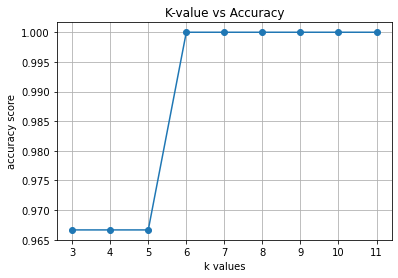

In [26]:
# plot the accuracy and neighbors
plt.plot(neighbors, accuracy, "o-")
plt.xlabel("k values")
plt.ylabel("accuracy score")
plt.title("K-value vs Accuracy")
plt.grid()
plt.show()

k-value 6 and above is showing an accuracy of 100%. Hence repeat the model creation taking an optimum value of 6.

In [27]:
# create knn model again with n_neighbors=6

knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [28]:
print("The confusion matrix of K-Nearest Neighbors model:\n",confusion_matrix(y_test,knn_pred))
print("\nThe accuracy score of K-Nearest Neighbors model is :",accuracy_score(y_test, knn_pred))
print("The classification report of K-Nearest Neighbors model:\n", classification_report(y_test, knn_pred))

The confusion matrix of K-Nearest Neighbors model:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy score of K-Nearest Neighbors model is : 1.0
The classification report of K-Nearest Neighbors model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The accuracy, recall and precision score of KNN model is very high (100%).All the predicted values were true.

#### c) Support Vector Machines

In [29]:
# import support vector classifier
from sklearn.svm import SVC

In [30]:
# create the model using linear kernel
svm = SVC(kernel = "linear")
svm_model1 = svm.fit(X_train,y_train)
svm_pred1 = svm_model1.predict(X_test)

In [31]:
# evaluate the model
print("The confusion matrix of SVM model:\n",confusion_matrix(y_test,svm_pred1))
print("\nThe accuracy score of SVM model is :",accuracy_score(y_test, svm_pred1))
print("The classification report of SVM model:\n", classification_report(y_test, svm_pred1))

The confusion matrix of SVM model:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy score of SVM model is : 1.0
The classification report of SVM model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [32]:
# create the model using rbf-radial basis function kernel
svm = SVC(kernel = "rbf")
svm_model2 = svm.fit(X_train,y_train)
svm_pred2 = svm_model2.predict(X_test)

In [33]:
# evaluate the model
print("The confusion matrix of SVM model:\n",confusion_matrix(y_test,svm_pred2))
print("\nThe accuracy score of SVM model is :",accuracy_score(y_test, svm_pred2))
print("The classification report of SVM model:\n", classification_report(y_test, svm_pred2))

The confusion matrix of SVM model:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

The accuracy score of SVM model is : 0.9666666666666667
The classification report of SVM model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [34]:
# create the model using polynomial kernel
svm = SVC(kernel = "poly")
svm_model3 = svm.fit(X_train,y_train)
svm_pred3 = svm_model3.predict(X_test)

In [35]:
print("The confusion matrix of SVM model:\n",confusion_matrix(y_test,svm_pred3))
print("\nThe accuracy score of SVM model is :",accuracy_score(y_test, svm_pred3))
print("The classification report of SVM model:\n", classification_report(y_test, svm_pred3))

The confusion matrix of SVM model:
 [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]

The accuracy score of SVM model is : 0.9333333333333333
The classification report of SVM model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Of all the SVM models ,the SVM model with linear kernel showed the best accuracy, precision and recall i.e, 100%.

#### d) Decision Trees

In [36]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(max_depth=5)
dt_model = dt.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [38]:
print("The confusion matrix of Decision Tree Classifier:\n",confusion_matrix(y_test,dt_pred))
print("\nThe accuracy score of Decision Tree Classifier is :",accuracy_score(y_test, dt_pred))
print("The classification report of Decision Tree Classifier:\n", classification_report(y_test, dt_pred))

The confusion matrix of Decision Tree Classifier:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy score of Decision Tree Classifier is : 1.0
The classification report of Decision Tree Classifier:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The decision tree classifier model gave very high accuracy,precision and recall score-100%.

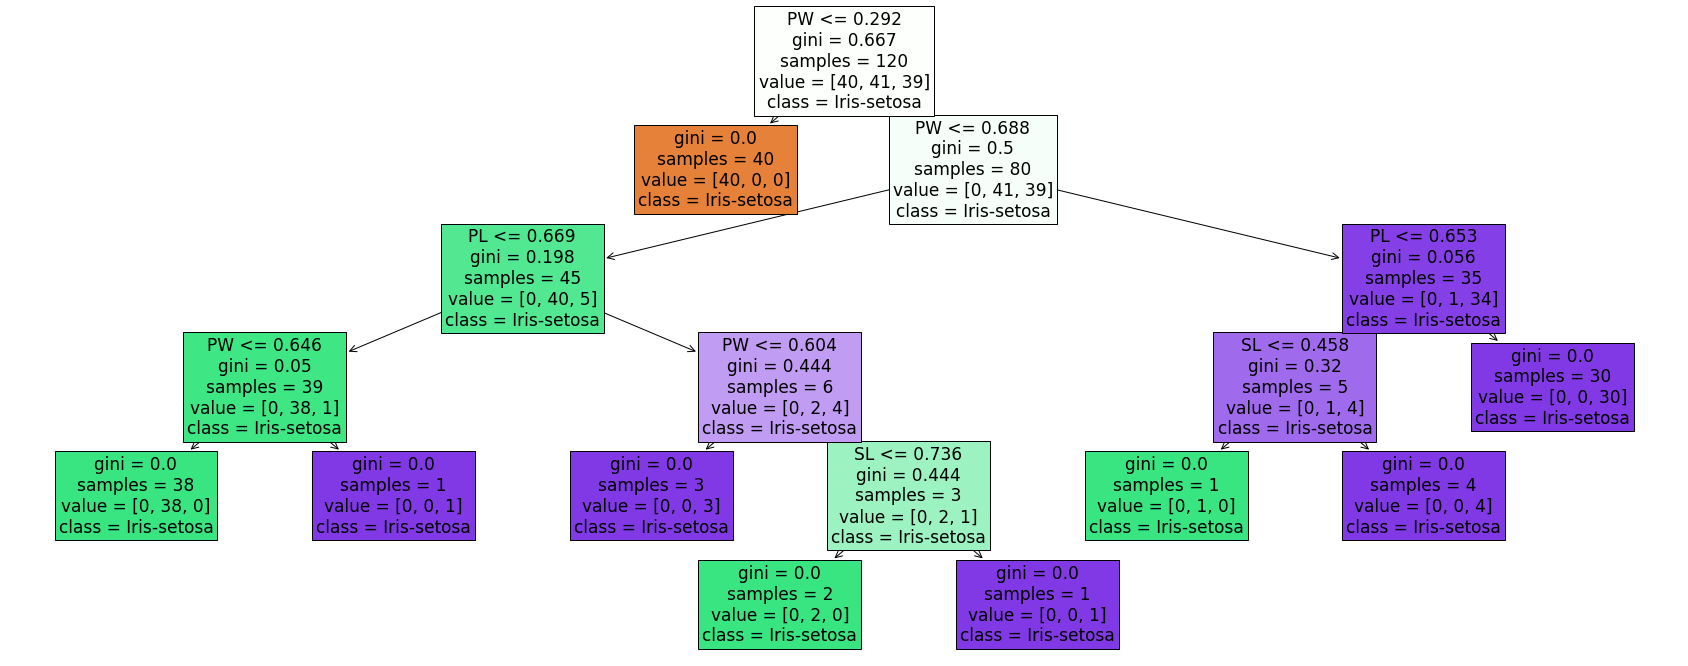

In [39]:
# plot the decision tree
from sklearn import tree

plt.figure(figsize=(30,12), facecolor ='w')
tree.plot_tree(dt_model,feature_names = X.columns,class_names = y,rounded = False,filled = True,fontsize=17)
plt.show()

#### e) Random Forest Algorithm

In [40]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train,y_train)
rfc_pred = rfc_model.predict(X_test)

In [42]:
# evaluate the model
print("The confusion matrix of Random Forest Classifier:\n",confusion_matrix(y_test,rfc_pred))
print("\nThe accuracy score of Random Forest Classifier is :",accuracy_score(y_test, rfc_pred))
print("The classification report of Random Forest Classifier:\n",classification_report(y_test, rfc_pred))

The confusion matrix of Random Forest Classifier:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy score of Random Forest Classifier is : 1.0
The classification report of Random Forest Classifier:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Random Forest Classifier showed very high accuracy, precision and recall score -100%.

For the iris datset, KNN, SVM-linear kernel, Decision Tree and Random Forest classifier gives very high accuracy of 100%.There is no difference between actual and predict values. Hence all these models are best suited to perform classification on the data.  